In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [4]:
df = pd.read_csv("movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Data cleaning
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing * 100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Removing null values
df = df.dropna()

In [7]:
# Drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [10]:
# Data types
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [11]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['correctyear'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,Janu
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,Febr
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,Janu
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,Febr


In [12]:
df['correctmonth'] = df['released'].astype(str).str[5:7]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June,13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July,"2,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June,20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July,"2,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,Janu,ry
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,Febr,ar
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,Janu,ry
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,Febr,ar


In [13]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece,be
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri,2
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece,be
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece,be
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,Janu,ry
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,June,"4,"
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,May,"1,"
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,Marc,1


<Axes: >

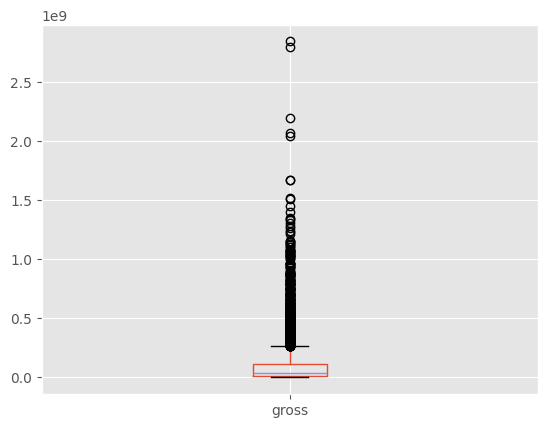

In [14]:
df.boxplot(column=['gross'])

In [15]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

<Axes: >

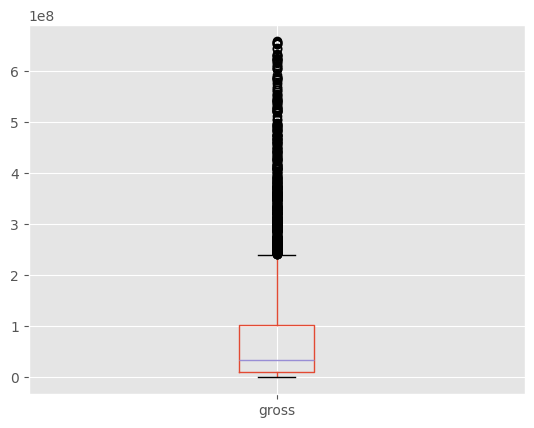

In [16]:
df.boxplot(column=['gross'])

Text(0.5, 1.0, 'Gross Earnings vs Budget')

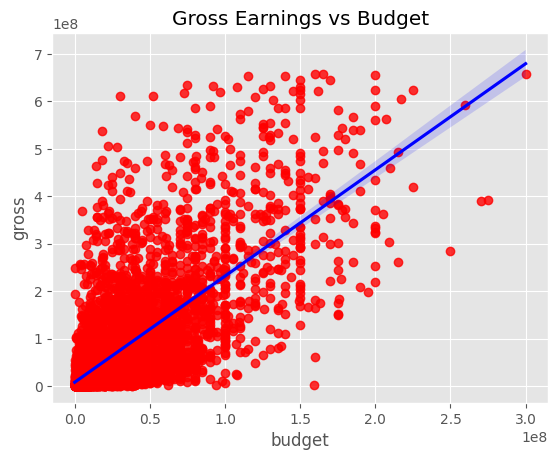

In [17]:
# Looking at correlation

sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Gross Earnings vs Budget')

In [18]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

/var/folders/nl/x2fjhgnn697_5yg7r03sbkk40000gn/T/ipykernel_71236/635532796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerized[col_name]= df_numerized[col_name].astype('category')
/var/folders/nl/x2fjhgnn697_5yg7r03sbkk40000gn/T/ipykernel_71236/635532796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerized[col_name] = df_numerized[col_name].cat.codes
/var/folders/nl/x2fjhgnn697_5yg7r03sbkk40000gn/T/ipykernel_71236/635532796.py:6: SettingWithCopyWarning: 
A value is trying to be set 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
0,4586,6,6,1980,1278,8.4,927000.0,1789,2819,692,46,19000000.0,46998772.0,1418,146.0,11,18
1,3840,6,1,1980,1111,5.8,65000.0,1573,1151,212,47,4500000.0,58853106.0,448,104.0,10,25
2,3557,4,0,1980,1333,8.7,1200000.0,755,1807,1148,47,18000000.0,538375067.0,938,124.0,11,26
3,203,4,4,1980,1111,7.7,221000.0,887,1403,1463,47,3500000.0,83453539.0,1100,88.0,10,25
4,722,6,4,1980,1152,7.3,108000.0,717,350,269,47,6000000.0,39846344.0,1075,98.0,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,408,6,0,2020,892,6.6,140000.0,16,2377,1800,47,90000000.0,426505244.0,448,124.0,9,51
7649,3481,4,0,2020,702,6.5,102000.0,850,2296,146,47,85000000.0,319715683.0,1100,99.0,8,47
7650,1133,4,1,2020,892,5.6,53000.0,1803,2814,1459,47,175000000.0,245487753.0,1389,101.0,9,51
7651,3889,4,1,2020,747,6.8,42000.0,294,2078,634,6,135000000.0,111105497.0,12,100.0,8,47


In [19]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
# A correlation coefficient of .50 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

gross         votes           0.579419
votes         gross           0.579419
gross         budget          0.700497
budget        gross           0.700497
correctyear   released        0.996229
released      correctyear     0.996229
correctyear   correctyear     1.000000
rating        rating          1.000000
correctmonth  correctmonth    1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
runtime       runtime         1.000000
company       company         1.000000
year          year            1.000000
genre         genre           1.000000
name          name            1.000000
dtype: float64

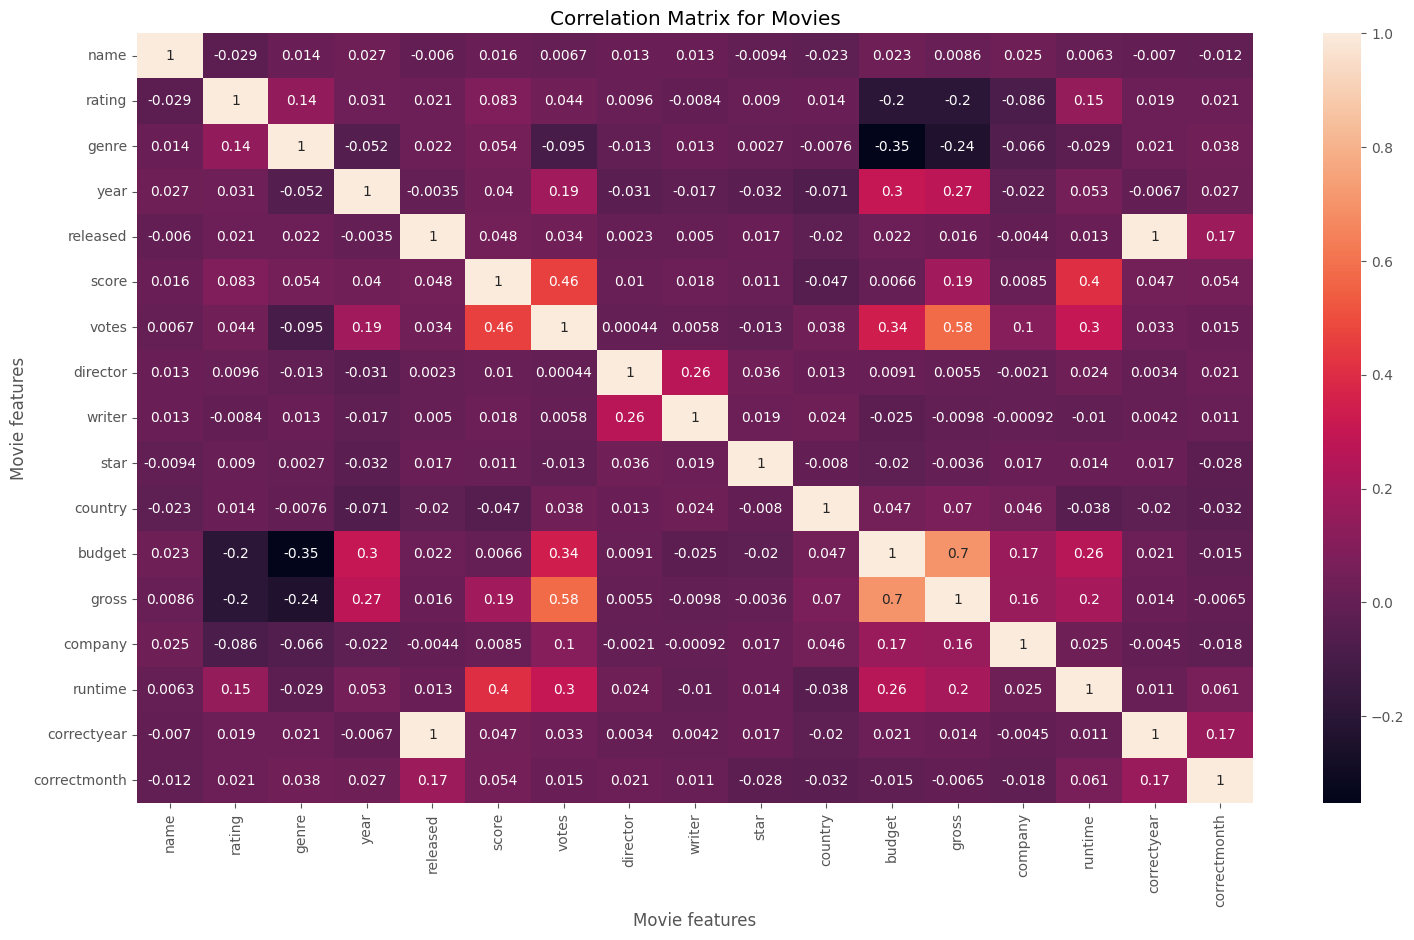

In [22]:
correlation_matrix = df_numerized.corr(method = 'pearson')
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [23]:
df.groupby(['correctmonth']).mean()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
correctmonth,,,,,,,,,,,,,,,,
0,2484.094156,5.279221,3.555195,2001.918831,750.370130,6.298377,87686.938312,1010.496753,1602.698052,973.788961,44.006494,2.585487e+07,6.011388e+07,895.366883,104.490260,8.386364
1,2816.470968,5.258065,3.345161,2001.145161,843.277419,6.206129,73899.190323,1024.080645,1598.048387,942.077419,43.564516,2.880290e+07,6.231842e+07,884.693548,105.570968,8.477419
2,2630.300000,5.050000,3.250000,2000.875000,1202.762500,6.306250,98387.700000,1172.387500,1810.187500,930.875000,42.887500,3.125650e+07,7.201620e+07,860.125000,106.287500,9.987500
3,2756.440000,5.280000,3.840000,2001.960000,1051.200000,6.272000,82492.000000,771.040000,1694.360000,990.600000,44.040000,3.392800e+07,6.083253e+07,908.480000,104.560000,9.200000
4,2289.863636,5.590909,4.363636,2003.227273,843.909091,6.504545,97968.181818,1010.909091,1543.318182,1080.772727,42.909091,2.975000e+07,6.686180e+07,1033.227273,108.863636,8.181818
5,2246.758621,5.655172,3.827586,1998.620690,993.275862,6.548276,118386.206897,1191.620690,1798.827586,1032.137931,45.448276,2.796724e+07,6.045573e+07,870.034483,107.689655,8.862069
6,2249.766667,5.233333,3.500000,2001.300000,728.700000,6.413333,74396.666667,985.166667,1478.600000,898.666667,44.133333,3.523833e+07,8.659823e+07,965.566667,105.500000,7.566667
7,2736.608696,5.652174,2.565217,2004.434783,835.391304,6.156522,58847.826087,1033.521739,1669.652174,887.304348,46.521739,3.130000e+07,5.846457e+07,932.695652,103.173913,8.043478
8,2353.000000,5.258065,3.838710,2000.032258,1149.193548,6.180645,73910.387097,1003.677419,1452.967742,986.193548,45.870968,3.217258e+07,5.480553e+07,878.548387,103.225806,9.516129


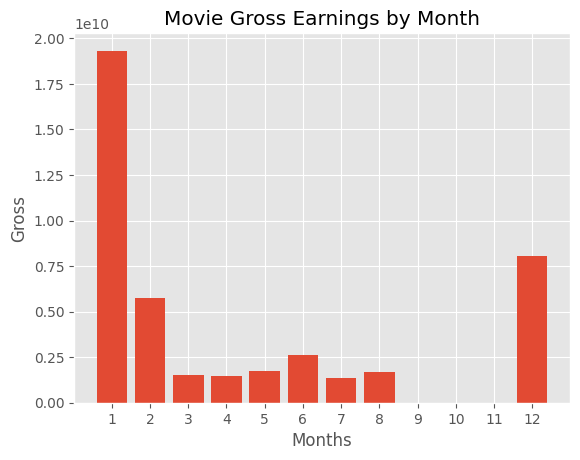

In [29]:
monthly = df.groupby('correctmonth', as_index=True)['gross'].sum().reindex(range(1,13), fill_value=0)

months = np.arange(1,13)

plt.bar(months, monthly.values)
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

In [26]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()
gross_earnings_avg.sort_values()

runtime
209.0       968853.0
242.0      4770222.0
229.0      5473212.0
71.0       6582052.0
171.0      8064706.5
            ...     
151.0    422587580.5
181.0    424208848.0
183.0    449220945.0
163.0    497409852.0
187.0    562363449.0
Name: gross, Length: 124, dtype: float64

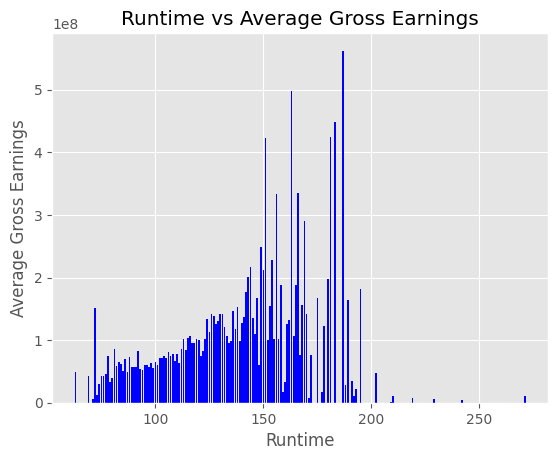

In [27]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()

plt.bar(gross_earnings_avg.index, gross_earnings_avg, color="blue")

plt.xlabel('Runtime')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

plt.show()

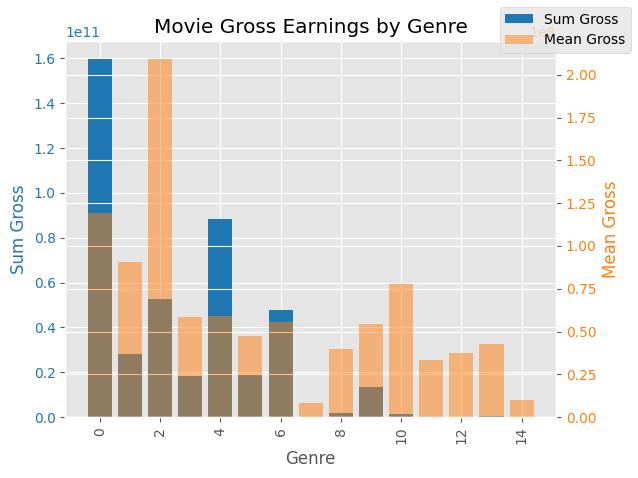

In [28]:
# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()
sum_gross = grouped_df['sum'].tolist()
mean_gross = grouped_df['mean'].tolist()

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()